<a href="https://colab.research.google.com/github/jdiazram/DEEP_GEOM/blob/master/Modelos_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [ ]:
import numpy as np #
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf # Import TensorFlow 
print(tf.version.VERSION) # Check TensorFlow version
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline 
#hará que las salidas de gráficos aparezcan y se almacenen en el cuaderno

from IPython.display import clear_output #limpiar

2.7.0


# Cargar base de datos

In [ ]:
# Carga de base de datos
!wget https://www.dropbox.com/s/duigf1xgl38tb8o/DG_V2.zip
!unzip DG_V2.zip
!rm DG_V2.zip

clear_output()
print('Base de datos cargada')

Base de datos cargada


# Preprocesamiento

In [ ]:
#carga de datos en variables
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]
#print(train_labels)

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]
#print(validation_labels)
print('Train dataset shape:', train_imgs.shape) 
print('Validation dataset shape:', validation_imgs.shape)
mf_validation = validation_imgs.shape[0]

Train dataset shape: (7000, 150, 150, 3)
Validation dataset shape: (875, 150, 150, 3)


(150, 150, 3)


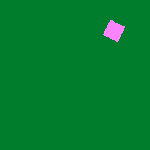

In [ ]:
#normalizacion
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[2556].shape)
array_to_img(train_imgs[2556])

In [ ]:
#Codificación los LABEL mediante One Hot Encoding
batch_size = 30
num_classes = 7
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
train_labels_enc = to_categorical(train_labels_enc, num_classes)
validation_labels_enc = le.transform(validation_labels)
validation_labels_enc = to_categorical(validation_labels_enc, num_classes)

print(train_labels[455:465]) 
print(train_labels_enc[455:465]) #ejemplo de rango

['elipse', 'cuadrado', 'trapecio', 'rombo', 'elipse', 'triangulo', 'rectangulo', 'rombo', 'cuadrado', 'rombo']
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30, shuffle=True)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=30, shuffle=True)
#input_shape = (150, 150, 3)
print(train_generator.n)
print(val_generator.n)

7000
875


# Modelo

In [ ]:
#modelos sin dropout, solo usar 1. Para usar Dropout elimine comentario en la capa correspodiente
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

modelo_1 = [    
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_2 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_3 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_4 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_5 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_6 = [    
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(128, activation='relu'),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_7 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(128, activation='relu'),
    #Dropout(0.3),
    Dense(256, activation='relu'),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_8 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(128, activation='relu'),
    #Dropout(0.3),
    Dense(256, activation='relu'),
    #Dropout(0.3),
    Dense(512, activation='relu'),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

modelo_9 = [
    Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    #Dropout(0.3),
    Dense(128, activation='relu'),
    #Dropout(0.3),
    Dense(256, activation='relu'),
    #Dropout(0.3),
    Dense(512, activation='relu'),
    #Dropout(0.3),
    Dense(512, activation='relu'),
    #Dropout(0.3),
    Dense(7, activation='softmax')
]

In [ ]:
with tf.device('/device:GPU:0'):
  model = Sequential(modelo_6)

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0

In [ ]:
#para calcular el tiempo de entrenamiento
import time
start = time.time() #partiendo

# Entrenamiento

Los steps_per_epoch y epochs para los experimentos variaron de la siguiente forma:
*   steps_per_epoch = 30 | epochs = 30
*   steps_per_epoch = 30 | epochs = 100
*   steps_per_epoch = 86 | epochs = 100
*   steps_per_epoch = 233 | epochs = 100

Y según la configuracion anterior, se usó Dropout o no



In [ ]:
with tf.device('/device:GPU:0'):
  steps_per_epoch = train_generator.n//train_generator.batch_size
  epochs = 100

  STEP_SIZE_VAL=val_generator.n//val_generator.batch_size

  history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/100
233/233 [==============================] - 39s 133ms/step - loss: 1.8760 - accuracy: 0.1914 - val_loss: 1.7166 - val_accuracy: 0.2425
Epoch 2/100
233/233 [==============================] - 31s 133ms/step - loss: 1.7333 - accuracy: 0.2600 - val_loss: 1.6111 - val_accuracy: 0.3115
Epoch 3/100
233/233 [==============================] - 32s 137ms/step - loss: 1.5976 - accuracy: 0.3334 - val_loss: 1.4082 - val_accuracy: 0.3931
Epoch 4/100
233/233 [==============================] - 31s 132ms/step - loss: 1.3843 - accuracy: 0.4349 - val_loss: 1.2221 - val_accuracy: 0.5356
Epoch 5/100
233/233 [==============================] - 31s 132ms/step - loss: 1.2628 - accuracy: 0.4839 - val_loss: 1.1631 - val_accuracy: 0.5218
Epoch 6/100
233/233 [==============================] - 31s 133ms/step - loss: 1.2348 - accuracy: 0.4927 - val_loss: 1.1070 - val_accuracy: 0.5851
Epoch 7/100
233/233 [==============================] - 31s 132ms/step - loss: 1.1763 - accuracy: 0.5195 - val_loss: 1.1124 -

In [ ]:
done = time.time()
elapsed = done - start #terminando
print("Tiempo total de ejecución training/validation", elapsed)

Tiempo total de ejecución training/validation 3135.1372678279877


# Gráfico de entrenamiento

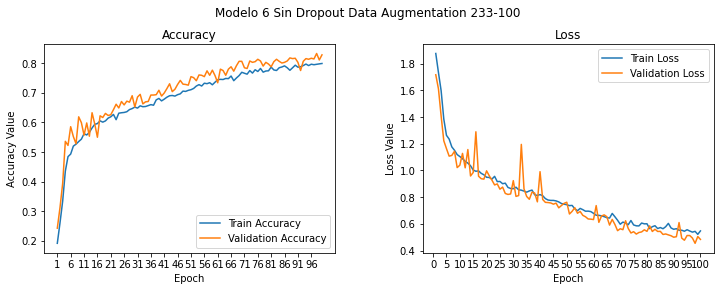

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Modelo 6 Sin Dropout Data Augmentation 233-100', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
#se guarda modelo luego del entrenamiento
model.save('modelo6_sDP-DA-233-100.h5') #

# Carga del modelo entrenado


In [ ]:
from keras.models import load_model

# cargar el modelo
modelo_6_sDpDA = load_model('modelo6_sDP-DA-233-100.h5')

clear_output()
print('Modelo cargado')

Modelo cargado


# Preprocesamiento de datos de Test

In [ ]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

print('Test dataset shape:', test_imgs.shape)
print(test_labels[100:105])

Test dataset shape: (875, 150, 150, 3)
['cuadrado', 'rombo', 'cuadrado', 'rectangulo', 'circulo']


In [ ]:
test_labels_enc = le.transform(test_labels)
test_labels_enc = to_categorical(test_labels_enc, num_classes)

test_eval = modelo_6_sDpDA.evaluate(test_imgs_scaled, test_labels_enc, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

28/28 [==============================] - 0s 8ms/step - loss: 0.5111 - accuracy: 0.8046
Test loss: 0.5110574960708618
Test accuracy: 0.8045714497566223


In [ ]:
from sklearn import metrics
import numpy as np

# de numero a etiquetas, según prediccion del modelo
predictions = np.argmax(modelo_6_sDpDA.predict(test_imgs_scaled), axis=-1)

test_labels_pred = []

for i in range(875):
    if predictions[i] == 0:
        test_labels_pred.append('circulo')
    elif predictions[i] == 1:
        test_labels_pred.append('cuadrado')
    elif predictions[i] == 2:
        test_labels_pred.append('elipse')
    elif predictions[i] == 3:
        test_labels_pred.append('rectangulo')
    elif predictions[i] == 4:
        test_labels_pred.append('rombo')
    elif predictions[i] == 5:
        test_labels_pred.append('trapecio')
    else:
        test_labels_pred.append('triangulo')

print(test_labels_pred)

['rombo', 'triangulo', 'triangulo', 'trapecio', 'trapecio', 'rombo', 'rombo', 'trapecio', 'rectangulo', 'circulo', 'triangulo', 'circulo', 'cuadrado', 'rectangulo', 'cuadrado', 'triangulo', 'cuadrado', 'rombo', 'rectangulo', 'trapecio', 'circulo', 'triangulo', 'triangulo', 'triangulo', 'trapecio', 'triangulo', 'rectangulo', 'rectangulo', 'elipse', 'trapecio', 'trapecio', 'rectangulo', 'cuadrado', 'cuadrado', 'rectangulo', 'cuadrado', 'circulo', 'cuadrado', 'trapecio', 'triangulo', 'triangulo', 'triangulo', 'rombo', 'rombo', 'triangulo', 'elipse', 'cuadrado', 'rectangulo', 'triangulo', 'circulo', 'rombo', 'triangulo', 'rombo', 'circulo', 'rombo', 'rombo', 'rombo', 'cuadrado', 'rectangulo', 'elipse', 'rectangulo', 'triangulo', 'cuadrado', 'circulo', 'trapecio', 'triangulo', 'circulo', 'elipse', 'cuadrado', 'circulo', 'trapecio', 'circulo', 'cuadrado', 'circulo', 'triangulo', 'rombo', 'triangulo', 'cuadrado', 'circulo', 'circulo', 'cuadrado', 'circulo', 'cuadrado', 'elipse', 'rombo', 'eli

In [ ]:
from sklearn import metrics

# Matriz de confusión
print(metrics.confusion_matrix(test_labels, test_labels_pred))

# Precision and recall, F1-score y support
print(metrics.classification_report(test_labels, test_labels_pred, digits=3))

[[116   1   1   0   4   0   3]
 [  4  98   0   4   6   3  10]
 [ 18   3  92   0   2   3   7]
 [  1  20   1  95   2   4   2]
 [  4   6   0   0 100   1  14]
 [  6   8   0   1   3  94  13]
 [  4   1   1   0   6   4 109]]
              precision    recall  f1-score   support

     circulo      0.758     0.928     0.835       125
    cuadrado      0.715     0.784     0.748       125
      elipse      0.968     0.736     0.836       125
  rectangulo      0.950     0.760     0.844       125
       rombo      0.813     0.800     0.806       125
    trapecio      0.862     0.752     0.803       125
   triangulo      0.690     0.872     0.770       125

    accuracy                          0.805       875
   macro avg      0.822     0.805     0.806       875
weighted avg      0.822     0.805     0.806       875

